### What is Statistical Learning?

#### Advertising Data
The advertising data consists of product sales from 200 markets and their associated tv, radio, and newspaper advertising budgets. What kind of relationship can be seen between advertising budget and sales

In [3]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_adv = pd.read_csv('data/Advertising.csv')
# Sorting Sales of individual department for plotting
df_adv_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')
df_adv_new.head(10)

,Sales,variable,adv_budget
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8
5,7.2,TV,8.7
6,11.8,TV,57.5
7,13.2,TV,120.2
8,4.8,TV,8.6
9,10.6,TV,199.8


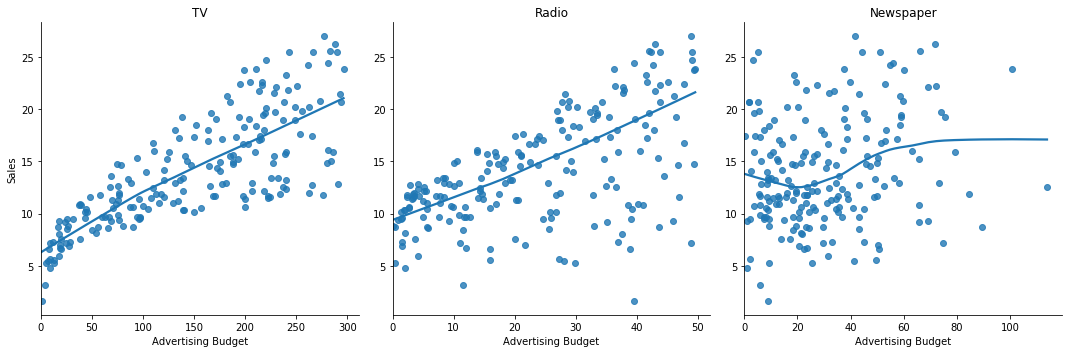

In [8]:
#linear model
lm = sns.lmplot('adv_budget', 'Sales', data=df_adv_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')

Shown are Sales vs TV, Radio and Newspaper, with a blue
linear-regression line fit separately to each.
Can we predict Sales using these three?

Perhaps we can do better using a model:
Sales ≈ f(TV, Radio, Newspaper)


Here Sales is a response or target that we wish to predict. We
generically refer to the response as Y .
TV is a feature, or input, or predictor; we name it X1.
Likewise name Radio as X2, and so on.
We can refer to the input vector collectively as


\begin{equation}X=\left(\begin{array}{l}
X_{1} \\
X_{2} \\
X_{3}
\end{array}\right)\end{equation}

Now we write our model as:

\begin{equation}Y=f(X)+\epsilon\end{equation}

where $\epsilon$ captures measurement errors and other discrepancies.


#### What is $f(X)$ good for?

- With a good f we can make predictions of Y at new points
X = x.
- We can understand which components of
$X=\left(X_{1}, X_{2}, \dots, X_{p}\right)$ are important in explaining Y , and
which are irrelevant. e.g. Seniority and Years of
Education have a big impact on Income, but Marital
Status typically does not.
- Depending on the complexity of $f$, we may be able to
understand how each component $X_{j}$ of X affects Y .

Is there an ideal $f(X)$? In particular, what is a good value for
$f(X)$ at any selected value of X, say X = 4? There can be
many Y values at X = 4. A good value is
$f(4)=E(Y | X=4)$
$E(Y |X = 4)$ means expected value (average) of Y given X = 4.
This ideal $f(x) = E(Y |X = x)$ is called the regression function

![image.png](images/Chapter_2/f_x.png)

#### The regression function $f(x)$
- Is also defined for vector X; e.g.
$f(x)=f\left(x_{1}, x_{2}, x_{3}\right)=E\left\{Y | X_{1}=x_{1}, X_{2}=x_{2}, X_{3}=x_{3}\right)$

- Is the ideal or optimal predictor of Y with regard to
mean-squared prediction error: $f(x) = E(Y |X = x)$ is the
function that minimizes $E\left[(Y-g(X))^{2} | X=x\right]$ over all
functions g at all points X = x.
- $\epsilon = Y − f(x)$ is the irreducible error — i.e. even if we knew
f(x), we would still make errors in prediction, since at each
X = x there is typically a distribution of possible Y values.
- For any estimate $\hat{f}(x)$ of $f(x)$, we have:
\begin{equation}E\left[(Y-\hat{f}(X))^{2} | X=x\right]=\underbrace{[f(x)-\hat{f}(x)]^{2}}_{\text {Reducible}}+\underbrace{\operatorname{Var}(\epsilon)}_{\text {Irreducible}}\end{equation}

#### How to estimate $f$

Typically we have few if any data points with X = 4
exactly.
- So we cannot compute $E(Y|X=x)!$
- Relax the definition and let
\begin{equation}\hat{f}(x)=\operatorname{Ave}(Y | X \in \mathcal{N}(x))\end{equation}
where $N(x)$ is some neighborhood of $x$.

![image.png](images/Chapter_2/f_x_estimate.JPG)

- Nearest neighbor averaging can be pretty good for small p i.e. p ≤ 4 and large-ish N.
- We will discuss smoother versions, such as kernel and spline smoothing later in the course.


- Nearest neighbor methods can be lousy when p is large.
Reason: the $\textit{curse of dimensionality}$. Nearest neighbors
tend to be far away in high dimensions.
    • We need to get a reasonable fraction of the N values of $y_{i}$ to average to bring the variance down—e.g. 10%.
    • A 10% neighborhood in high dimensions need no longer be local, so we lose the spirit of estimating E(Y |X = x) by local averaging.
![image](images/Chapter_2/curse_of_dimension.PNG)

#### Parametric and structured models

The linear model is an important example of a parametric
model:
$f_{L}(X)=\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots \beta_{p} X_{p}$
- A linear model is specified in terms of p + 1 parameters
$\beta_{0}, \beta_{1}, \dots, \beta_{p}$
- We estimate the parameters by fitting the model to
training data.
- Although it is almost never correct, a linear model often
serves as a good and interpretable approximation to the
unknown true function f(X).


A linear model $\hat{f}_{L}(X)=\hat{\beta}_{0}+\hat{\beta}_{1} X$ gives a reasonable fit here:
![image](images/Chapter_2/Linear.PNG)

A quadratic model $\hat{f}_{Q}(X)=\hat{\beta}_{0}+\hat{\beta}_{1} X+\hat{\beta}_{2} X^{2}$ fits slightly
better.
![image](images/Chapter_2/Quadratic.PNG)

More 3D models will be better explained in further chapters.

#### Some tradeoffs
- Prediction accuracy versus interpretability.
— Linear models are easy to interpret; thin-plate splines
are not.
- Good fit versus over-fit or under-fit.
— How do we know when the fit is just right?
- Parsimony versus black-box.
— We often prefer a simpler model involving fewer
variables over a black-box predictor involving them all.



### Bias-Variance tradeoff

Suppose we have fit a model ˆf(x) to some training data Tr, and
let (x0, y0) be a test observation drawn from the population. If
the true model is $Y=f(X)+\epsilon(\text { with } f(x)=E(Y | X=x))$,
then

\begin{equation}E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2}=\operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right)+\left[\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]^{2}+\operatorname{Var}(\epsilon)\end{equation}

The expectation averages over the variability of y0 as well as
the variability in Tr. Note that $\left.\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]=E\left[\hat{f}\left(x_{0}\right)\right]-f\left(x_{0}\right)$
Typically as the flexibility of $\hat{f}$ increases, its variance increases,
and its bias decreases. So choosing the flexibility based on
average test error amounts to a bias-variance trade-off.


![tradeoff](images/1-bias-variance-tradeoff.jpg)
The image perfectly illustrates the general idea of the bias-variance trade-off. As model complexity grows, bias decreases (sometimes to 0) and variance increases (sometimes to infinity!). The goal is to find a balance.

In normal human communication the word **bias** typically means your inherent prejudice against someone or some thing. In statistical learning, when the term bias is used we mean the measure of how much a simpler model deviates from the actual theoretical 'truth'. So low bias would simply mean that the chosen model does a good job approximating the current model complexities and high bias would mean a model unable to explain model complexities.

**Variance**, a word more domain-specific to statistical learning, represents the degree to which your model, $\hat{f}$ would change when given new training data. Think about coming up with 100 different models for 100 different training sets and plotting them all on one plot. The more scatter in the plot, the higher the variance.

We would like to have as low bias and variance as possible since low bias would mean our model approximates the true relationship, $f$ well and low variance since we don't want our model changing much depending on which data it gets trained on.

It's generally very difficult to achieve a model with both low bias and low variance and its quite easy to achieve one without the other. A low bias model can be generated by fitting a highly flexible model with many degrees of freedom and with enough degrees of freedom should have 0 error. But models like this will likely highly overfit to the randomness of the data and look very different for a new training.

On the other hand, achieve a model with low variance is quite easy. A model with a very low number of degrees of freedom, like a simple linear regression, should not change much from training sample to training sample. This stability from model to model would represent low variance.

### Classification problems and Error rate
The focus of the examples in the slides thus far have been on regression problems, those with numbers as outputs. Many problems are classification problems, those with categories as output. A very simple and intuitive way to assess your model for classification is find the percentage of observations that you classified correctly. This is just like seeing how many answers you got right in a test. There are more metrics that can be calculated for classification problems and those will be discussed in later chapters.

Again, as in regression, the only real way to determine how well your model is, is to measure the test error rate. Thats the error rate on data that was not used to train the model. The unseen observations.


- Typically we measure the performance of $\hat{C}(x)$ using the
misclassification error rate:
\begin{equation}\operatorname{Err}_{\mathrm{Te}}=\operatorname{Ave}_{i \in \operatorname{Te}} I\left[y_{i} \neq \hat{C}\left(x_{i}\right)\right]\end{equation}
- The Bayes classifier (using the true $p_{k}(x)$) has smallest
error (in the population).
- Support-vector machines build structured models for $C(x)$.
- We will also build structured models for representing the
$p_{k}(x)$. e.g. Logistic regression, generalized additive models.

#### K-Nearest Neighbors
KNN is an attempt to estimate the local probability distribution of an observation by simply counting up the classes of all of its neighbors and using that empirical tally as its probability distribution for that particular observation. The 'K' is simply the number of neighbors each point will observe before reaching a conclusion as to what its local probability distribution will be.

KNN is one of the simplest algorithms and requires no pre-training. Here is the way it works
1. For each observation, find its closest neighbors based on some distance function (euclidean, cosine, etc...)
2. Each of these neighbors 'casts' a vote for which class its in
3. Tally up the votes and this is your local probability distribution
4. Choose the highest vote getting class as a prediction for the current observation

![knn](images/knn.gif)

The example above shows of the 3 closest neighbors, 2 are of class B and 1 is of class A so therefore the local probability disribution for the questionable point would be B: 2/3 and A: 1/3 and KNN would predict the class to be B

#### Choosing K
K is usually chosen by a method called cross validation which will be discussed later. But in general choosing a K to be very large, lets say as large as the number of observations, would simply have the algorithm pick the most common class and all predictions would be the same class. On the opposite end of the spectrum, choosing k = 1 would introduce lots of randomness (variance) as the prediction is based solely on one data point.

Problems and examples on classification will be discussed in further chapters.

### Chapter 2 exercises
There are 10 problems starting at page 52

#### Solutions
It's highly suggested to attempt the problems from each chapter before looking at solutions.

Many people have posted solutions online. Google "ISLR solutions". 

### Problem 1
**1a.** Flexible model: The large number of observations would prevent the model from following the outlier/noise. The number of predictors being small would also help with the model  
**1b.** Inflexible model: With a very large number of predictors its possible to achieve low bias. A low number of observations would introduce lots of variance as randomness would be picked up as a signal very easily.  
1c. Flexible model: An inflexible model by definition cannot model complex relationships  
1d. Inflexible model: Flexible models follow noise and since noise is high this would not be ideal

### Problem 2
2a. Regression, inference, 500 x 3  
2b. Classification, prediction, 20 x 13  
2c. Regression, prediciton, 52 x 3

### Problem 3
3a. Hand-picked points to show the 5 curves

Text(0.5, 0, 'Complexity')

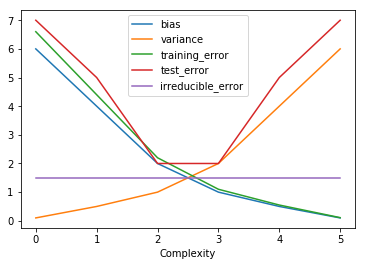

In [4]:
bias = np.array([6, 4, 2, 1, .5, .1])
variance = bias[::-1]
training_error = bias * 1.1
test_error = np.array([7, 5, 2, 2, 5, 7])
irreducible_error = np.ones(6) * 1.5

df_3 = pd.DataFrame({'bias': bias,
              'variance':variance,
             'training_error': training_error,
             'test_error':test_error,
             'irreducible_error': irreducible_error})

df_3.plot()
plt.xlabel('Complexity')

3b. 
- Bias- When using an inflexible model, it is unlikely that the chosen model will closely match how the real-life situation. Adding flexibility will allow for a much closer alignment between model and reality  
- Variance increases as flexibility increases since more flexibility allows for more noise to be fit  
- Training error could decrease to 0 as flexibility increases as it becomes possible to model most all of the error.
- Test Error might initially decrease until a certain flexibility is reached and then overfitting will inevitably occur and error will start increasing again  
- Irreducible error is constant random noise that is inherent in the data.

### Problem 4
a) Three real world classification problems
* The postal service determining which character an address is. Prediction.  
* Determining if a movie review is positive, negative or neutral. Inference
* Determining whether a tumor is cancerous or not. Both

b) Three real world regression problems  
* Tomorrows stock price. prediction
* Next months GDP. inference
* Probability of default on credit card. both. Although this is typically framed as a classification problem. The probability itself is real-valued and thus can be thought of as a regression.  

c) Three cluster problems
* Finding similar groups of stocks strictly based on their price movements
* Finding similar groups of products bought at a grocery store
* Finding similar groups of news articles by topic

### Problem 5
Advantages of a very flexible model is its ability to model a very complex relationship between input and response. Very flexible models are prone to overfitting - modeling the error and not the signal. More flexible models are preferred when there is a greater sample of data to train on and the relationship is non-linear. Less flexible models are preferable with smaller data, large number of features relative to observations and a simpler, usually linear relationship between predictors and response.

### Problem 6
Parametric approach locks you into a model with a certain structure. You are limited by the constraints of the model. Advantages are simplicity, direct inference of predictors and less computational time to find coefficients to describe model. Disadvantage is the lack of flexibility. Real-life situation might not meet model assumptions.

### Problem 7

In [5]:
df_7 = pd.DataFrame({'x1': [0, 2, 0, 0, -1, 1], 'x2':[3, 0, 1, 1, 0, 1], 'x3':[0, 0, 3, 2, 1, 1], 
                     'y':['R', 'R', 'R', 'G', 'G', 'R']})
df_7

# PART a
# Get x1, x2, x3 from the above dataframe. Subtract (0, 0, 0) from it and square each dimension
dist = (df_7.values[:, :3] - np.array([0, 0, 0])) ** 2

# Sum across the rows and make sure the type is float
summed_distance = dist.sum(axis=1).astype('float')

# Take square root to get euclidean distance
euclidean_dist = np.sqrt(summed_distance)
euclidean_dist

array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])

#### Part b
with k = 1 the nearest neighbor is the 5th point (-1, 0, 1) at a distance of 1.4 from (0, 0, 0). This point is labeled Green, so we predict Green

#### Part c
With k = 3 the three nearest neighbors are points 5, 6 and 2. Points 6 and 2 both have Red as their label so we would predict Red.

#### Part d
If the true decision boundary is non-linear than a smaller k would do better and be more flexible and allow for local changes to contribute more to the prediction.

### Problem 8
#### Part a and b

In [6]:
df_college = pd.read_csv('data/college.csv', index_col=0)
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Part c

In [7]:
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


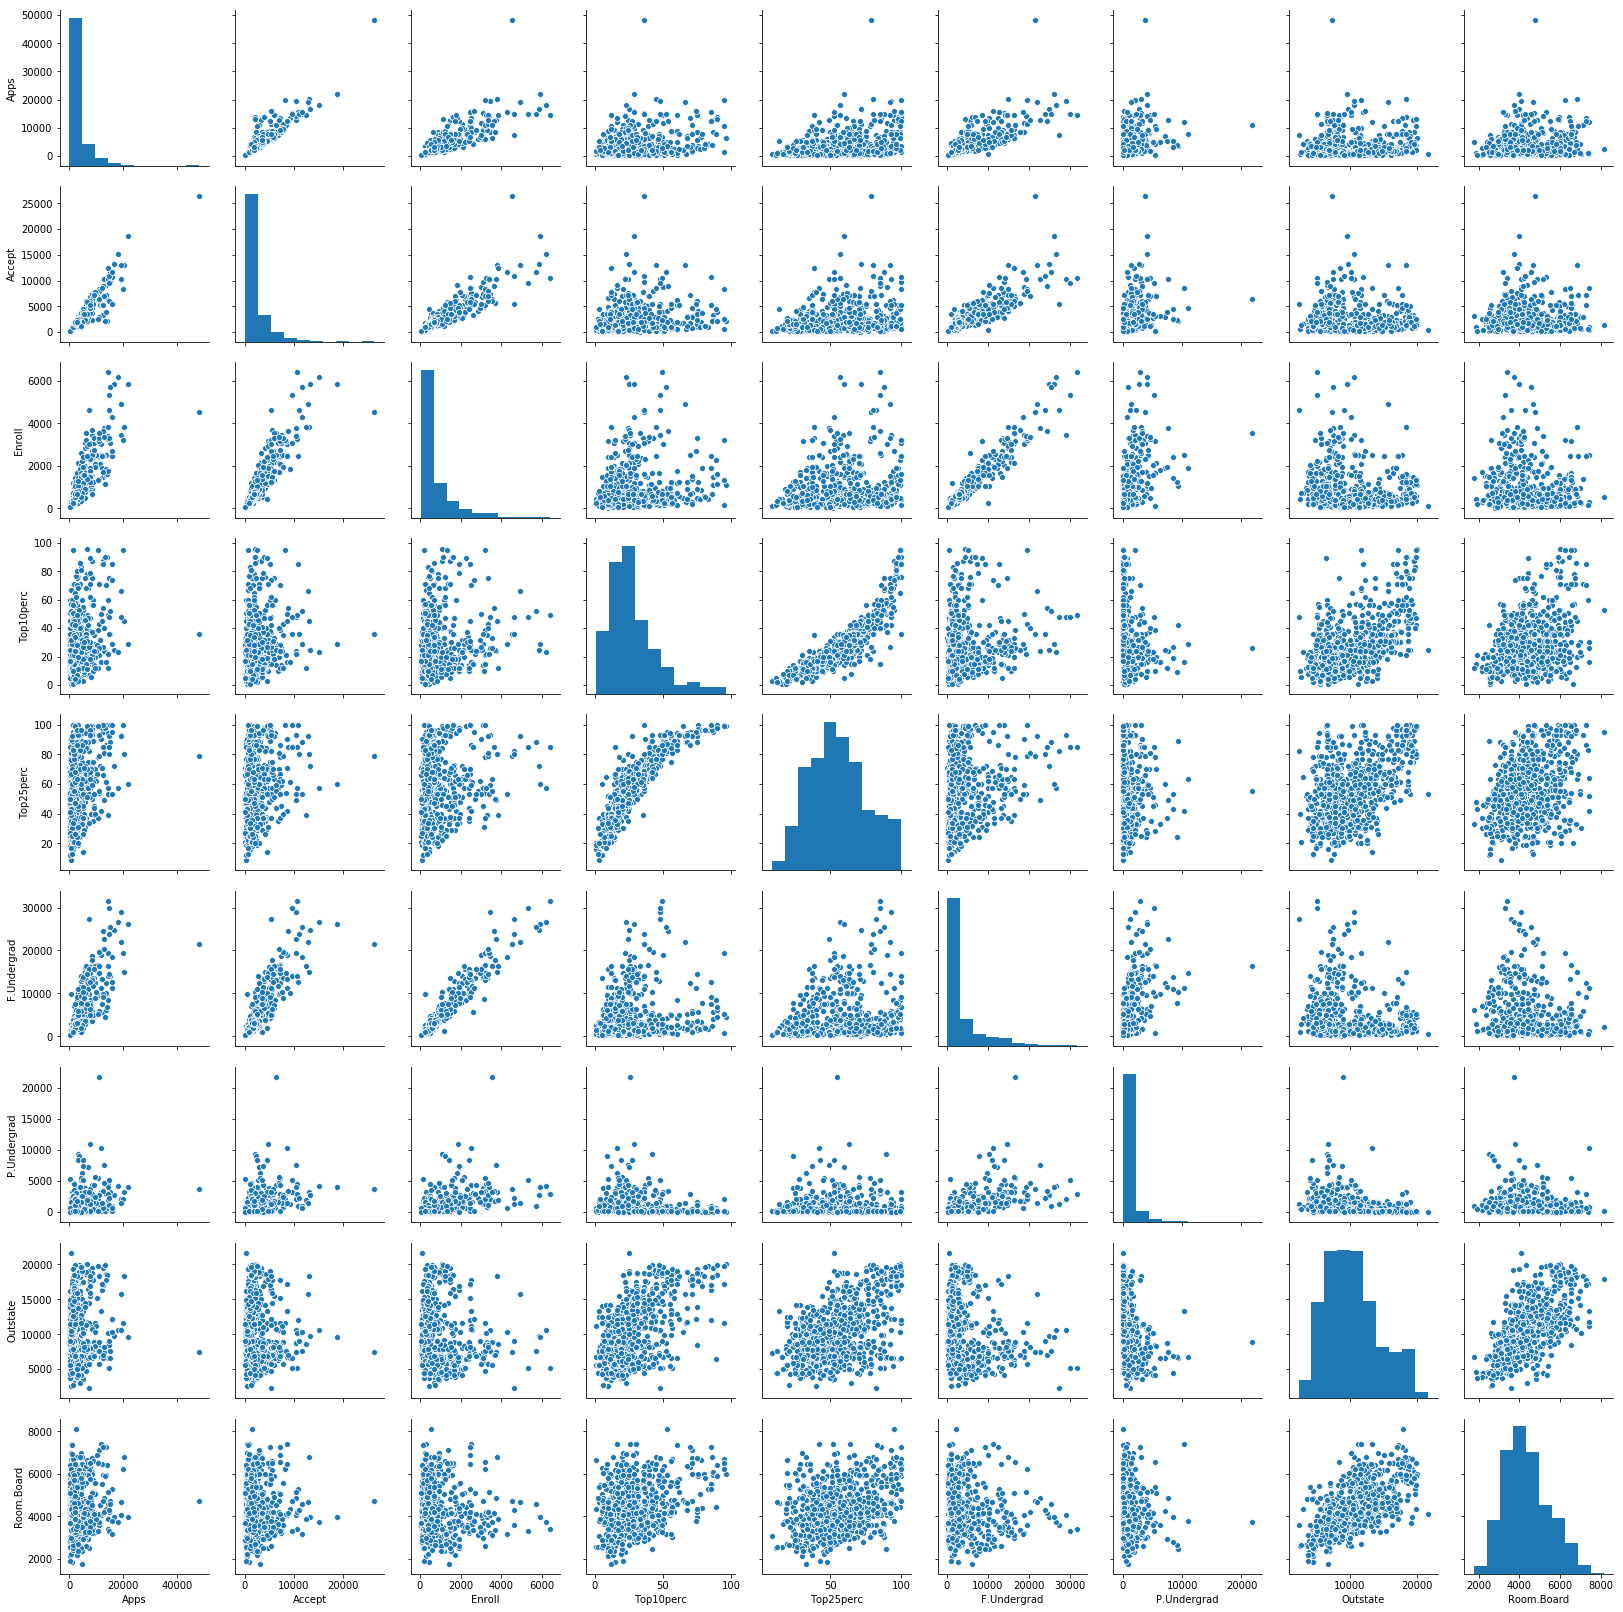

In [8]:
sns.pairplot(df_college.iloc[:, :10])

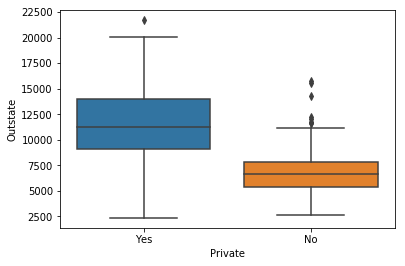

In [9]:
sns.boxplot('Private', 'Outstate', data=df_college)

No     699
Yes     78
Name: Elite, dtype: int64


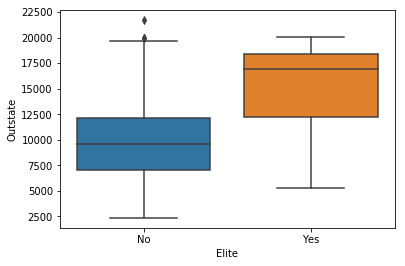

In [10]:
df_college
# Next line produces No/Yes categories based on a boolean(0/1) and saves it as a DataFrame column
df_college['Elite'] = pd.Categorical(np.where(df_college['Top10perc'] > 50, 'Yes', 'No'))
print(df_college['Elite'].value_counts())
sns.boxplot('Elite', 'Outstate', data=df_college)

Text(0.5, 1.0, 'Percentage Accepted')

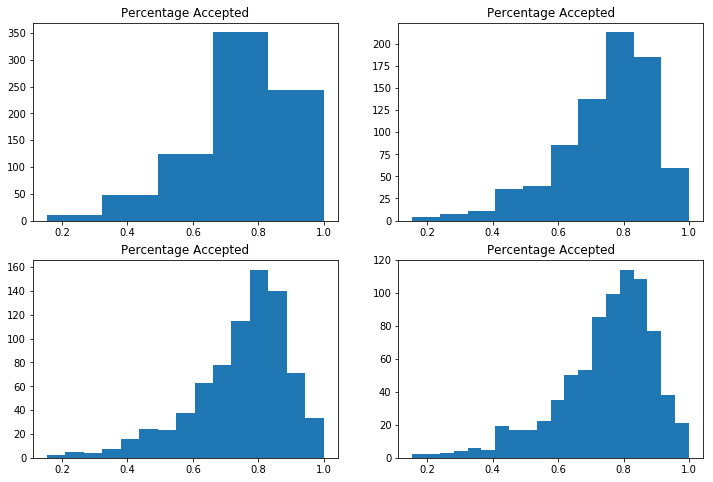

In [11]:
fig , ax = plt.subplots(2, 2, figsize=(12,8))
ax[0, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=5)
ax[0, 0].set_title('Percentage Accepted')

ax[0, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=10)
ax[0, 1].set_title('Percentage Accepted')

ax[1, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=15)
ax[1, 0].set_title('Percentage Accepted')

ax[1, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=20)
ax[1, 1].set_title('Percentage Accepted')

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


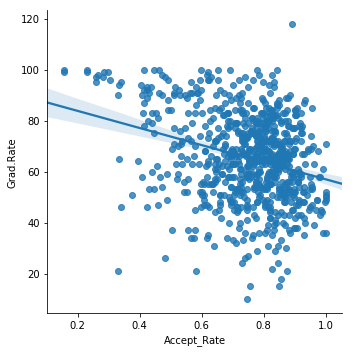

In [12]:
# Acceptance rate and Graduation rate are negatively correlated
df_college['Accept_Rate'] = df_college['Accept'] / df_college['Apps']
sns.lmplot('Accept_Rate', 'Grad.Rate', data=df_college)

### Problem 9

In [13]:
df_auto = pd.read_csv('data/auto.csv')
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [14]:
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
pd.concat((df_auto.iloc[:10], df_auto.iloc[85:])).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


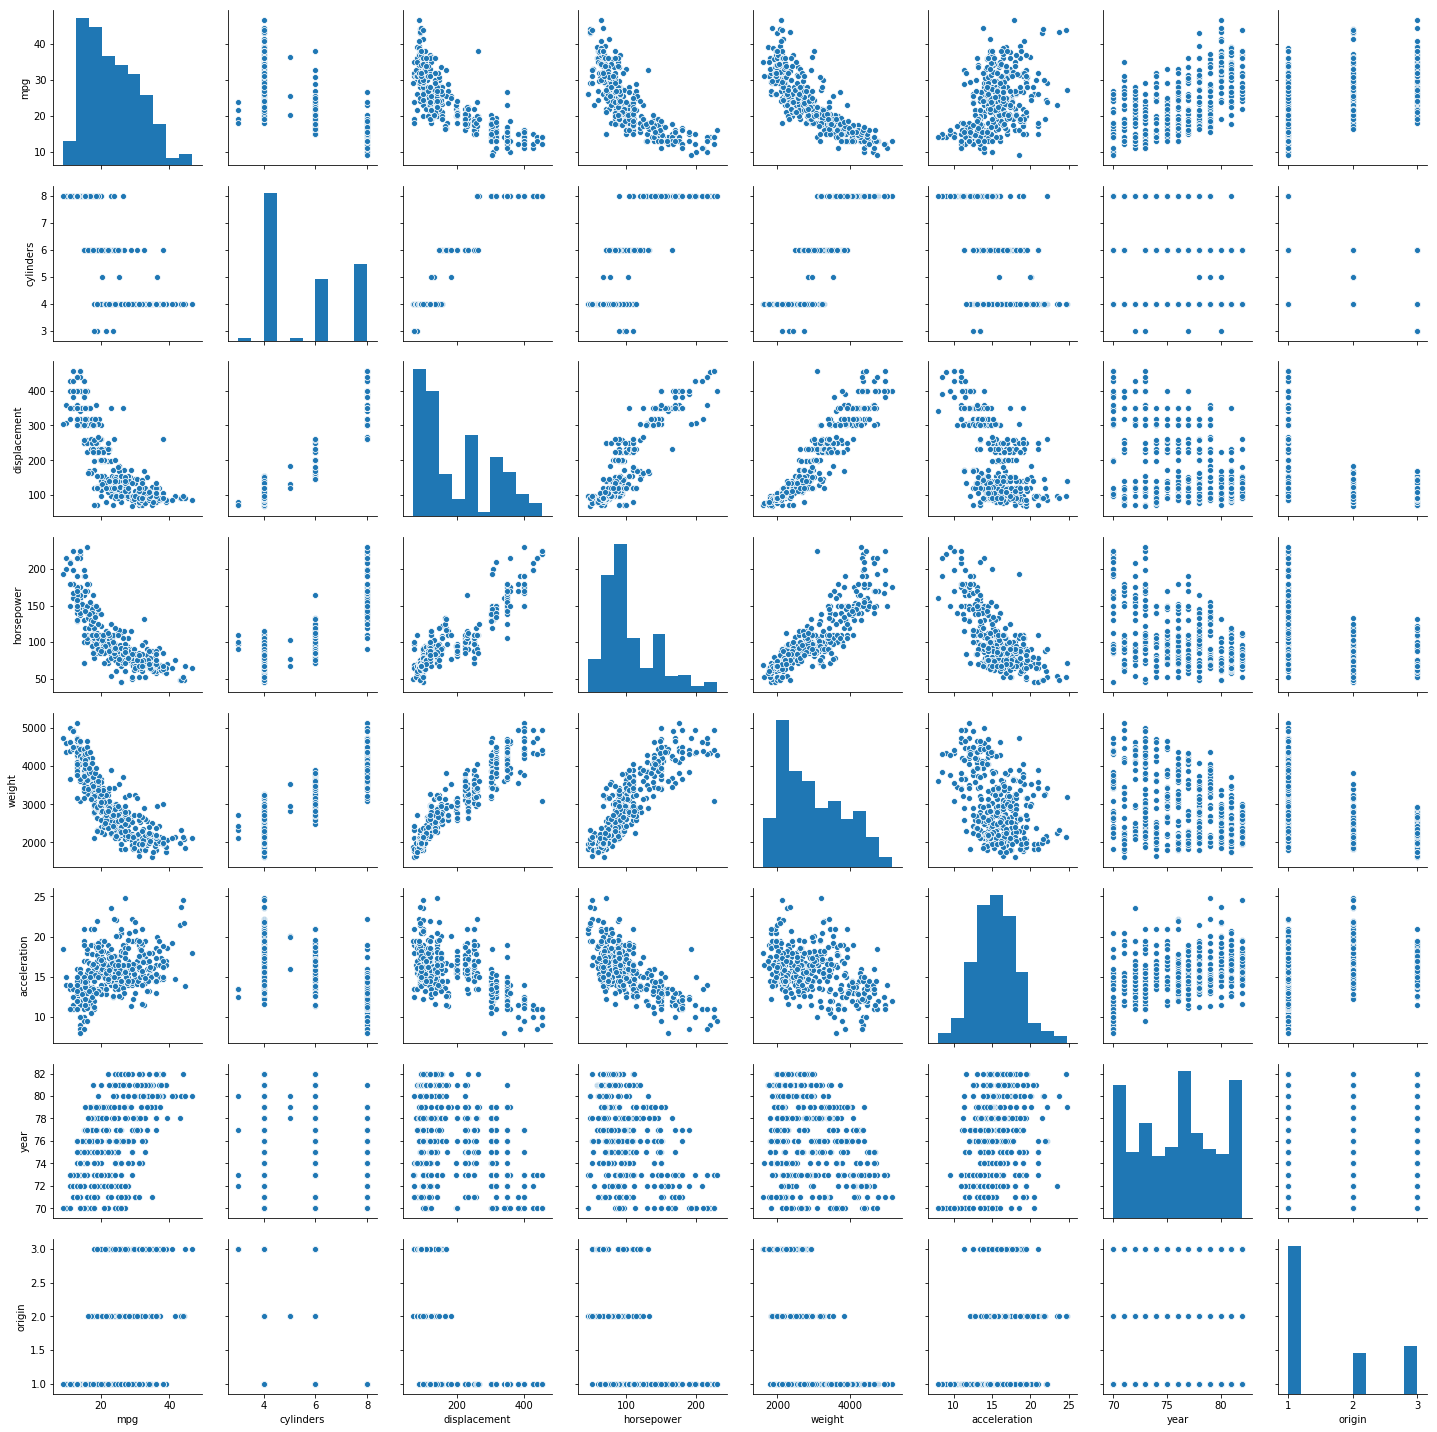

In [16]:
# Horsepower and displacement have a very strong postive linear relationship. Horsepower and mpg 
# have a strong negative relationship
sns.pairplot(df_auto)

 Looking at the pair plots above, mpg seems to have some relationship with just about all the other predictors.

### Problem 10

In [17]:
df_boston = pd.read_csv('data/boston.csv')
df_boston.shape

(506, 14)

This data frame contains the following columns:

crim per capita crime rate by town.

zn proportion of residential land zoned for lots over 25,000 sq.ft.

indus proportion of non-retail business acres per town.

chas Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox nitrogen oxides concentration (parts per 10 million).

rm average number of rooms per dwelling.

age proportion of owner-occupied units built prior to 1940.

dis weighted mean of distances to five Boston employment centres.

rad index of accessibility to radial highways.

tax full-value property-tax rate per $10,000.

ptratio pupil-teacher ratio by town.

black 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat lower status of the population (percent).

medv median value of owner-occupied homes in $1000s.

In [18]:
df_boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- There are no very strong relationships (> .9) with crime. The highest two are **rad**, **tax** and **lstat**. Crime is correlated with density of population (from what I've read before) so rad might be representative of how dense the population is if you are close to highways. Tax rates are generally higher the closer you are to a city center so higher tax rates might imply denser populations. And lower status (lstat) makes sense since more crime is committed by those less well off.
- Below are the towns that have a max for each of the predictors. Seems there are some limitation in the data such that 132 towns have exactly 24 as a value for rad and 121 towns have exactly 396.9 as a value for black. Crime also seems to be strangely distributed with nearly all values hovering around 0 and a few serveral orders of magnitude greater.

In [19]:
df_boston.loc[df_boston.idxmax().unique()].style.highlight_max()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,88.9762,0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.9,17.21,10.4
57,0.01432,100,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.9,3.95,31.6
488,0.15086,0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
142,3.32105,0,19.58,1,0.871,5.403,100,1.3216,5,403,14.7,396.9,26.82,13.4
364,3.47428,0,18.1,1,0.718,8.78,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
353,0.01709,90,2.02,0,0.41,6.728,36.1,12.1265,5,187,17,384.46,4.5,30.1
356,8.98296,0,18.1,1,0.77,6.212,97.4,2.1222,24,666,20.2,377.73,17.6,17.8
354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22,382.8,8.05,18.2
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24


In [20]:
(df_boston['rad'] == 24).sum(), (df_boston['black'] == 396.9).sum()

(132, 121)

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

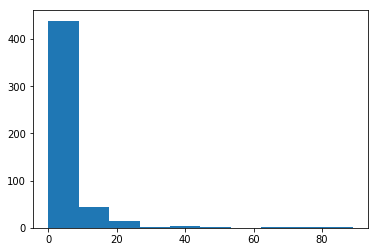

In [21]:
plt.hist(df_boston['crim'])

In [25]:
df_boston['chas'].sum()


35

In [24]:
df_boston['ptratio'].median()

19.05

In [23]:
# rad and black are both those suspicious maximum values and crim is a ridiculous outlier. More evidence
# of bad data
df_boston.loc[df_boston['medv'].idxmin()]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [26]:
(df_boston['rm'] > 7).sum(), (df_boston['rm'] > 8).sum()

(64, 13)

In [27]:
pd.DataFrame({'More than 8 rooms': df_boston[df_boston['rm'] > 8].describe().loc['50%'], 
              '8 or less rooms' : df_boston[df_boston['rm'] <= 8].describe().loc['50%']})

,More than 8 rooms,8 or less rooms
crim,0.52014,0.24522
zn,0.00000,0.00000
indus,6.20000,9.69000
chas,0.00000,0.00000
nox,0.50700,0.53800
rm,8.29700,6.18500
age,78.30000,77.30000
dis,2.89440,3.21570
rad,7.00000,5.00000
tax,307.00000,334.00000


Most of the predictors are the similar in both groups except crime and median value of homes - both about double for more than 8 rooms.

**End of Chapter 2**